In [99]:
import numpy as np
from scipy.stats import stats, kstest
from random import random, uniform
from math import log

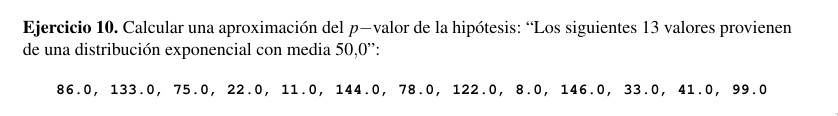

In [109]:
datos = [86, 133, 75, 22, 11, 144, 78, 122, 8, 146, 33, 41, 99]
'''
scipy first
'''
ks_stat, pvalue = kstest(datos, 'expon', args=(0, 50))
print(f"CALCULADO CON SCIPY: \n Estadistico: {ks_stat}\n pvalor: {pvalue}")

def F(x, _lambda):
  return 1 - np.exp(-x * _lambda)

def K_S(datos, theta):
  n = len(datos)
  d = 0
  datos.sort()
  for j in range(n):
    x = datos[j]
    d = max(d, (j+1)/n - F(x, theta),
            F(x, theta) - j/n)
  return d

def sim_1(datos, nsim=10_000):
  d_KS = K_S(datos, 1/50)
  pvalor = 0
  n = len(datos)
  for _ in range(nsim):
    uniformes = np.random.uniform(0, 1, n)
    uniformes.sort()
    d_j = 0
    for j in range(n):
      u_j = uniformes[j]
      d_j = max(d_j, (j+1)/n - u_j, u_j - j/n)
    if d_j >= d_KS:
      pvalor += 1
  return d_KS, pvalor/nsim

print(sim_1(datos))

# Nueva simulacion por las dudas

def sim_2(datos, nsim=10_000):
  n = len(datos)
  media = np.mean(datos)
  d_ks = K_S(datos, 1/media)
  _lambda = 1 / media
  pvalor = 0
  for _ in range(nsim):
    muestra = []
    for _ in range(n):
      muestra.append(-log(1-random())/_lambda)
    muestra.sort()
    _lambda_est = n/sum(muestra)
    d_j = K_S(muestra, _lambda_est)
    if d_j >= d_ks:
      pvalor += 1
  return pvalor/nsim


CALCULADO CON SCIPY: 
 Estadistico: 0.3922544552361856
 pvalor: 0.025889298597310706
(0.3922544552361856, 0.024)
